# Week 44 handin

# Handin Exercise 10

1. With the information below create a dictionary of the below and find out what action would be the cheapest by using linear algebra for each person.

**Needs to buy dogs for their pet shop**  

|person|dog_labrador|dog_puddle|dog_rottweiler|dog_bulldog|traveling_expense|
|--|--|--|--|--|--|
|p1|6|5|3|1|1|
|p2|3|6|2|2|1|
|p3|3|4|3|1|1|
|p4|15|4|3|8|0|

**Prices in the different countries**  

|Countries|Denmark|UK|China|USA|
|--|--|--|--|--|
|dog_labrador|2500|1700|700|1699|
|dog_puddle|4500|3000|2000|1500|
|dog_rottweiler|500|450|4500|890|
|dog_bulldog|1600|1700|1200|1900|
|traveling_expense|2600|2700|9000|5000|

2. All of the owners suddenly found out that they need to buy 3 times as many rottweilers and 10 times as many for bulldogs than previous expected.
	1. Use Matrix multiplication to change the table data.
	2. Again let's see what course of action is best for each person and how much it would cost now.
	3. What is the difference between the highest and the lowest price that each person could have choosen.

3. Download below data
	1. GDP (current US$) - European Union: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
	2. EU prices for selected representative products: https://ec.europa.eu/info/sites/info/files/market-prices-fruit-products_en_6.csv

4. From 3.1. Find the GDP from 1995-2019 for:
	1. Greece
	2. Spain
	3. France
	4. Italy
	5. Portugal
	6. European Union

5. From 3.2. Find the price of below items from 1995-2020 (2020-06) for the countries in assignment 4.
	1. Strawberries
	2. Nectarines
	3. Apples Braeburn

6. With this data.
	1. Make a line plot of 4. and 5.
	2. Try to create a correlation between the GDP and the price of the 3 products.

7. Using sklearn
	1. Predict the price of strawberries and the GDP in year 3020.

Extra:
8. With all of the data from exercise 4 and 5.
	1. Find out if there is a linear relationship between features and show the correlation.

## 02 Status

How far you got:

Made some of 6. But didn't finish with it fully. Haven't looked at 7/8 either. 

## 03 Exercises

1. With the information below create a dictionary of the below and find out what action would be the cheapest by using linear algebra for each person.

**Needs to buy dogs for their pet shop**  

|person|dog_labrador|dog_puddle|dog_rottweiler|dog_bulldog|traveling_expense|
|--|--|--|--|--|--|
|p1|6|5|3|1|1|
|p2|3|6|2|2|1|
|p3|3|4|3|1|1|
|p4|15|4|3|8|0|

**Prices in the different countries**  

|Countries|Denmark|UK|China|USA|
|--|--|--|--|--|
|dog_labrador|2500|1700|700|1699|
|dog_puddle|4500|3000|2000|1500|
|dog_rottweiler|500|450|4500|890|
|dog_bulldog|1600|1700|1200|1900|
|traveling_expense|2600|2700|9000|5000|

In [ ]:
import pandas as pd

shoppers = {
'p1':{'dog_labrador':6,'dog_puddle':5,'dog_rottweiler':3,'dog_bulldog':1, 'traveling_expense':1},
'p2':{'dog_labrador':3,'dog_puddle':6,'dog_rottweiler':2,'dog_bulldog':2, 'traveling_expense':1},
'p3':{'dog_labrador':3,'dog_puddle':4,'dog_rottweiler':3,'dog_bulldog':1, 'traveling_expense':1},
'p4':{'dog_labrador':15,'dog_puddle':4,'dog_rottweiler':3,'dog_bulldog':8, 'traveling_expense':0}
}

countries_price = {
'Denmark':{'dog_labrador':2500,'dog_puddle':4500,'dog_rottweiler':500,'dog_bulldog':1600, 'traveling_expense':2600},
'UK':{'dog_labrador':1700,'dog_puddle':3000,'dog_rottweiler':450,'dog_bulldog':1700, 'traveling_expense':2700},
'China':{'dog_labrador':700,'dog_puddle':2000,'dog_rottweiler':4500,'dog_bulldog':1200, 'traveling_expense':9000},
'USA':{'dog_labrador':1699,'dog_puddle':1500,'dog_rottweiler':890,'dog_bulldog':1900, 'traveling_expense':5000}
}

s_df = pd.DataFrame(shoppers).T
p_df = pd.DataFrame(countries_price)

shoppersdot = s_df.dot(p_df)
print(shoppersdot)


2. All of the owners suddenly found out that they need to buy 3 times as many rottweilers and 10 times as many for bulldogs than previous expected.

    1. Use Matrix multiplication to change the table data.
    2. Again let's see what course of action is best for each person and how much it would cost now.
    3. What is the difference between the highest and the lowest price that each person could have choosen.

In [ ]:
#A + B
import numpy as np

multi_array = np.array([[1,1,3,10,1]])
new_s_df = s_df*multi_array
print("New shopper list:\n\n",new_s_df)

p_df = pd.DataFrame(countries_price)

new_shoppersdot = new_s_df.dot(p_df)
print("\nNew dot list:\n\n",new_shoppersdot)

In [ ]:
#C
import pandas as pd

for num, name in enumerate(new_shoppersdot, start=1):
    user = new_shoppersdot.index[num-1]
    maxValues = new_shoppersdot.loc[[user]].max(axis = 1).iloc[0]
    minValues = new_shoppersdot.loc[[user]].min(axis = 1).iloc[0]
    saved = maxValues-minValues
    print(user, "Has saved:",saved,"\nBy buying it for",minValues,"instead of",maxValues,"\n")

3. Download below data

    1. GDP (current US$) - European Union: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
    2. EU prices for selected representative products: https://ec.europa.eu/info/sites/info/files/market-prices-fruit-products_en_6.csv

In [ ]:
from tqdm import tqdm
import requests
import os

def download_function(url):
    # read 1024 bytes every time 
    buffer_size = 1024
    # download the body of response by chunk, not immediately
    response = requests.get(url, stream=True)
    # get the total file size
    file_size = int(response.headers.get("Content-Length", 0))
    # get the file name
    filename = url.split("/")[-1]
    fullfilename = os.path.join('data', filename)

    # progress bar, changing the unit to bytes instead of iteration (default by tqdm)
    progress = tqdm(response.iter_content(buffer_size), f"Downloading {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
    with open(filename, "wb") as f:
        for data in progress:
            # write data read to the file
            f.write(data)
            # update the progress bar manually
            progress.update(len(data))
    print('File downloaded', filename)

In [ ]:
# A + B
GDP_url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
EU_prod_prices = "https://ec.europa.eu/info/sites/info/files/market-prices-fruit-products_en_6.csv"

download_function(GDP_url)
download_function(EU_prod_prices)

4. From 3.1. Find the GDP from 1995-2019 for:

    1. Greece
    2. Spain
    3. France
    4. Italy
    5. Portugal
    6. EU

In [123]:
import csv
import pandas as pd

df = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1593873.csv', skiprows=4)

year_mask = df.iloc[:,39:-2]
countries = ["Greece", "Spain", "France", "Italy", "Portugal"]
#countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
countries_data = {}

for country in countries:
    country_mask = (df[:]['Country Name'].str.contains(country) == True)
    data = df[country_mask].iloc[:,39:-2]
    df_new = data.rename(index={data.index[0]: country})
    #countries_data.append(df_new)
    countries_data[country] = df_new
#countries_data

countries_data

{'Greece':                 1995          1996          1997          1998          1999  \
 Greece  1.368784e+11  1.458616e+11  1.431576e+11  1.444282e+11  1.425407e+11   
 
                 2000          2001          2002          2003          2004  \
 Greece  1.301338e+11  1.361914e+11  1.538309e+11  2.019243e+11  2.405213e+11   
 
         ...          2010          2011          2012          2013  \
 Greece  ...  2.993616e+11  2.877978e+11  2.456707e+11  2.398620e+11   
 
                 2014          2015          2016          2017          2018  \
 Greece  2.370296e+11  1.965914e+11  1.952224e+11  2.035884e+11  2.181384e+11   
 
                 2019  
 Greece  2.098528e+11  
 
 [1 rows x 25 columns],
 'Spain':                1995          1996          1997          1998          1999  \
 Spain  6.146090e+11  6.425890e+11  5.900773e+11  6.192148e+11  6.346932e+11   
 
                2000          2001          2002          2003          2004  \
 Spain  5.968776e+11  6.272

5. From 3.2. Find the price of below items from 1995-2020 (2020-06) for the countries in assignment 4.

    1. Strawberries
    2. Nectarines
    3. Apples Braeburn

In [126]:
import csv
import pandas as pd

df = pd.read_csv('data/market-prices-fruit-products_en_6.csv', skiprows=0)


#county_codes = ["EL", "ES", "FR", "IT", "PT", "EU"]
county_codes = ["EL", "ES", "FR", "IT", "PT"]
countries = ["Greece", "Spain", "France", "Italy", "Portugal",]
#countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]

all_info = {}



for num, country in enumerate(county_codes, start=0):
    country_info = {}
    country_mask = (df[:]['Country'].str.contains(country) == True)
    data = df[country_mask].iloc[:,39:-2]
    for category in categories:
        country_info[category] = df.loc[country_mask & (df[:]['Product desc'].str.contains(category))]
    all_info[countries[num]] = country_info

    

print((all_info))
#print(countries[0])

{'Greece': {'Strawberries': Empty DataFrame
Columns: [Category, Sector Code, Product code, Product desc, Product Brief Description, Unit, Country, Period, MP Market Price]
Index: [], 'Nectarines':              Category Sector Code Product code Product desc  \
36     Fruit Products         FRL       NECNJA   Nectarines   
1011   Fruit Products         FRL       NECNJA   Nectarines   
1165   Fruit Products         FRL       NECNJA   Nectarines   
1328   Fruit Products         FRL       NECNJA   Nectarines   
1475   Fruit Products         FRL       NECNJA   Nectarines   
...               ...         ...          ...          ...   
20947  Fruit Products         FRL       NECNJA   Nectarines   
23690  Fruit Products         FRL       NECNJA   Nectarines   
23818  Fruit Products         FRL       NECNJA   Nectarines   
23940  Fruit Products         FRL       NECNJA   Nectarines   
24060  Fruit Products         FRL       NECNJA   Nectarines   

                              Product Brief De

6. With this data.

    1. Make a line plot of 4. and 5.
    2. Try to create a correlation between the GDP and the price of the 3 products.

,Greece,Spain,France,Italy,Portugal
1995,136878366230,614609020549,1601094756209,1174662070605,118122007430
1996,145861612825,642588992512,1605675086549,1312426527795,122630089680
1997,143157600024,590077272727,1452884917959,1241879604365,117016535162
1998,144428172835,619214834614,1503108739159,1270052525928,123946327916
1999,142540728958,634693160025,1492647560196,1252023758789,127427343916
2000,130133845771,596877648793,1362248940482,1143829832319,118310710337
2001,136191353467,627286800894,1376465324384,1167012796420,121498889485
2002,153830947016,705394315829,1494286655373,1270712309429,134156091661
2003,201924270316,905492099322,1840480812641,1574145823927,164862142212
2004,240521260988,1067093369754,2115742488204,1803226967966,189034502110


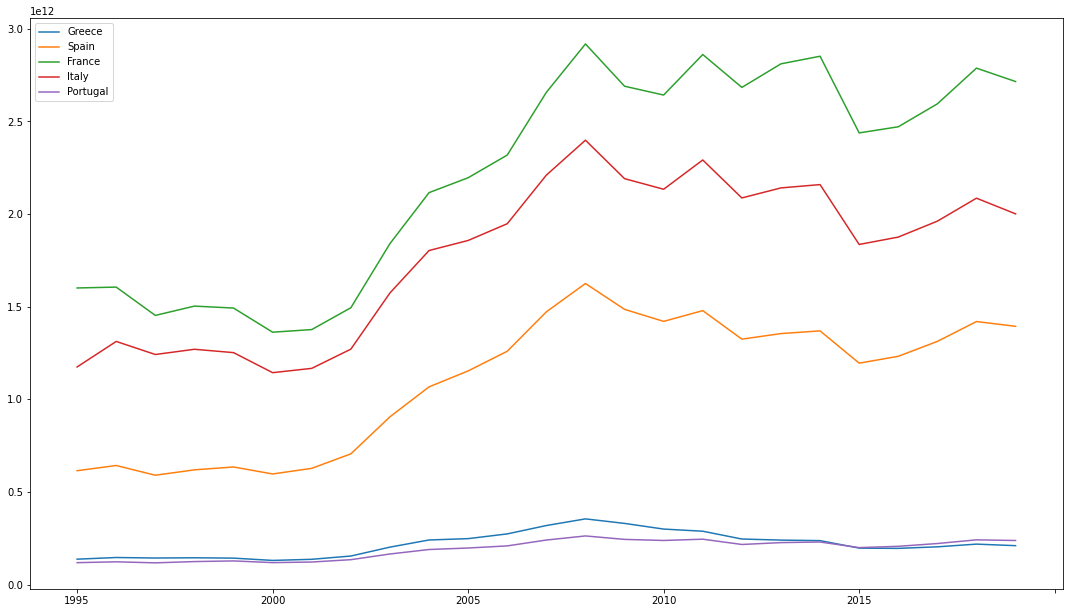

In [131]:
# A Getting GDP data out
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

type(countries_data)
countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]

gdp_greece = pd.DataFrame (countries_data["Greece"]).T
gdp_greece = pd.DataFrame (gdp_greece['Greece'].apply(np.int64))

gdp_spain = pd.DataFrame (countries_data['Spain']).T
gdp_spain = pd.DataFrame (gdp_spain['Spain'].apply(np.int64))

gdp_france = pd.DataFrame (countries_data['France']).T
gdp_france = pd.DataFrame (gdp_france['France'].apply(np.int64))

gdp_italy = pd.DataFrame (countries_data['Italy']).T
gdp_italy = pd.DataFrame (gdp_italy['Italy'].apply(np.int64))

gdp_portugal = pd.DataFrame (countries_data['Portugal']).T
gdp_portugal = pd.DataFrame (gdp_portugal['Portugal'].apply(np.int64))

#gdp_eu = pd.DataFrame (countries_data['European Union']).T
#gdp_eu = pd.DataFrame (gdp_eu['European Union'].apply(np.int64))

#gdp = [gdp_greece, gdp_spain, gdp_france, gdp_italy, gdp_portugal, gdp_eu]
gdp = [gdp_greece, gdp_spain, gdp_france, gdp_italy, gdp_portugal]

#all_info

gdp_result = pd.concat(gdp, axis=1)
gdp_result.plot()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
gdp_result

In [121]:
# A Getting data out with data we want of food
import datetime

start_year = 1995
end_year = 2021
difference = end_year - start_year 

#countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
countries = ["Greece", "Spain", "France", "Italy", "Portugal"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]

all_food_data = {}


for num, country in enumerate(countries, start=0):
    country_info = {}
    country_mask = all_info.get(country)
    all_food_data[country] = {}
    for category in categories:
        cat_country = pd.DataFrame(country_mask[category])
        all_food_data[country][category] = []
        if (len(cat_country) != 0):
            for years in range(difference):
                get_start = int(str(start_year+years)+"01")
                get_end = int(str(start_year+years)+"12")
                year_mask = cat_country[((cat_country[:]['Period']) >= get_start) & ((cat_country[:]['Period']) <= get_end)]
                sum = year_mask.iloc[:]["MP Market Price"].sum()
                mean = sum / 12
                if (sum != 0):
                    all_food_data[countries[num]][category].append({"year": start_year+years, country+" "+category+" avg. cost": mean})

all_food_data

{'Greece': {'Strawberries': [],
  'Nectarines': [{'year': 2005,
    'Greece Nectarines avg. cost': 17.188883333333333},
   {'year': 2007, 'Greece Nectarines avg. cost': 21.944441666666666},
   {'year': 2008, 'Greece Nectarines avg. cost': 25.6875},
   {'year': 2011, 'Greece Nectarines avg. cost': 18.930558333333334},
   {'year': 2012, 'Greece Nectarines avg. cost': 36.872225},
   {'year': 2013, 'Greece Nectarines avg. cost': 51.95208333333333},
   {'year': 2014, 'Greece Nectarines avg. cost': 54.297225},
   {'year': 2015, 'Greece Nectarines avg. cost': 48.668058333333335},
   {'year': 2016, 'Greece Nectarines avg. cost': 45.665975},
   {'year': 2017, 'Greece Nectarines avg. cost': 44.1865},
   {'year': 2018, 'Greece Nectarines avg. cost': 48.51266666666667},
   {'year': 2019, 'Greece Nectarines avg. cost': 36.989916666666666},
   {'year': 2020, 'Greece Nectarines avg. cost': 10.0875}],
  'Apples Braeburn': []},
 'Spain': {'Strawberries': [{'year': 1997,
    'Spain Strawberries avg. cos

In [120]:
# A Removing empty arrays of food

import matplotlib.pyplot as plt
import pandas as pd

#countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
countries = ["Greece", "Spain", "France", "Italy", "Portugal"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]



list_df = {}
for num, country in enumerate(countries, start=0):
    list_df[country] = {}
    data = all_food_data.get(country)
    for category in categories:
        #list_df[country][category] = []
        if(data.get(category) is not None):
            if(len(data.get(category)) == 0):
                data.pop(category)
            else:
                list_df[country][category] = []
                list_df[country][category] = data.get(category)

list_df

{'Greece': {'Nectarines': [{'year': 2005,
    'Greece Nectarines avg. cost': 17.188883333333333},
   {'year': 2007, 'Greece Nectarines avg. cost': 21.944441666666666},
   {'year': 2008, 'Greece Nectarines avg. cost': 25.6875},
   {'year': 2011, 'Greece Nectarines avg. cost': 18.930558333333334},
   {'year': 2012, 'Greece Nectarines avg. cost': 36.872225},
   {'year': 2013, 'Greece Nectarines avg. cost': 51.95208333333333},
   {'year': 2014, 'Greece Nectarines avg. cost': 54.297225},
   {'year': 2015, 'Greece Nectarines avg. cost': 48.668058333333335},
   {'year': 2016, 'Greece Nectarines avg. cost': 45.665975},
   {'year': 2017, 'Greece Nectarines avg. cost': 44.1865},
   {'year': 2018, 'Greece Nectarines avg. cost': 48.51266666666667},
   {'year': 2019, 'Greece Nectarines avg. cost': 36.989916666666666},
   {'year': 2020, 'Greece Nectarines avg. cost': 10.0875}]},
 'Spain': {'Strawberries': [{'year': 1997,
    'Spain Strawberries avg. cost': 49.29405833333333},
   {'year': 1998, 'Spai

,Greece Nectarines avg. cost,Spain Strawberries avg. cost,Spain Nectarines avg. cost,France Strawberries avg. cost,France Nectarines avg. cost,France Apples Braeburn avg. cost,Italy Strawberries avg. cost,Italy Nectarines avg. cost,Italy Apples Braeburn avg. cost,Portugal Strawberries avg. cost,Portugal Nectarines avg. cost
year,,,,,,,,,,,
1997,NaN,49.294058,NaN,NaN,NaN,NaN,8.865583,NaN,NaN,NaN,NaN
1998,NaN,113.293308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,177.454725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.556867,NaN
2000,NaN,154.776942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.458300,11.373433
2001,NaN,153.826933,28.365300,NaN,NaN,NaN,NaN,NaN,NaN,131.670517,NaN
2002,NaN,116.937083,25.522758,NaN,NaN,NaN,28.964283,26.760533,NaN,98.465275,NaN
2003,NaN,123.482092,47.841275,NaN,NaN,NaN,33.913400,29.272500,NaN,132.965275,NaN
2004,NaN,59.490558,46.788700,NaN,NaN,NaN,31.585900,19.127508,17.000000,86.250000,NaN
2005,17.188883,49.936950,23.489817,NaN,NaN,NaN,93.157692,25.002292,48.754950,168.625000,NaN


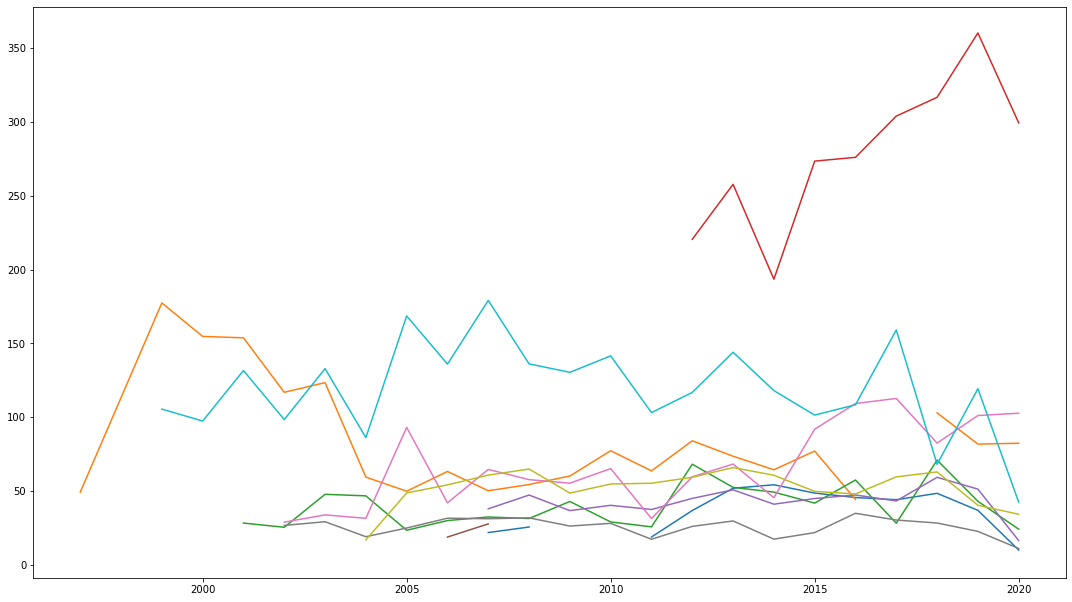

In [152]:
# A Now we have a correct dataframe of the food data.
import matplotlib.pyplot as plt

#countries = ["Greece", "Spain", "France", "Italy", "Portugal", "European Union"]
countries = ["Greece", "Spain", "France", "Italy", "Portugal"]
categories = ["Strawberries", "Nectarines", "Apples Braeburn"]

country_food_prices = []

def make_df():
    for country in countries:
        country = list_df.get(country)
        for category in categories:
            if(country.get(category) is not None):
                c_food_df = pd.DataFrame(country.get(category)).set_index('year')
                country_food_prices.append(c_food_df)

make_df()


country_food_prices
food_result = pd.concat(country_food_prices, axis=1)
food_result
plt.plot(food_result)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
food_result

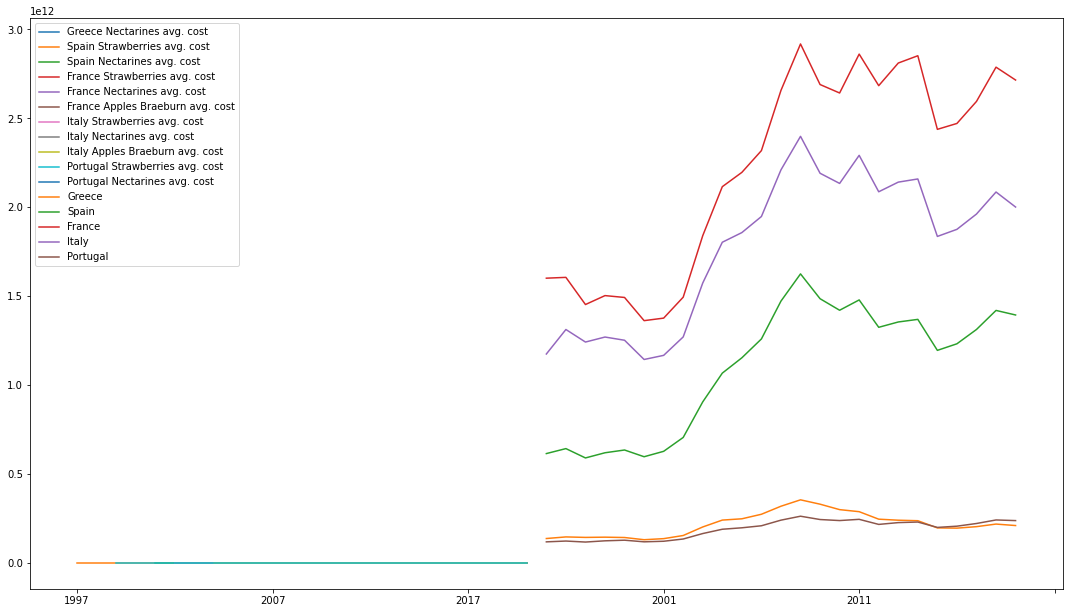

In [153]:
# A+B - Plot of both GDP and Food price (Doesn't say us too much as the prices are (obv) no where in same classes.
import matplotlib.pyplot as plt

country_food_df = pd.concat(country_food_prices, axis=1)
country_gdp_df = pd.concat(gdp, axis=1)
list_both_dfs = [country_food_df, country_gdp_df]
full_plot = pd.concat(list_both_dfs, axis=1)
full_plot.plot()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

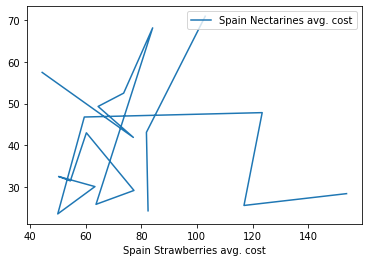

In [196]:
# B Try to create a correlation between the GDP and the price of the 3 products.

full_plot.plot(x = 1, y = 2)

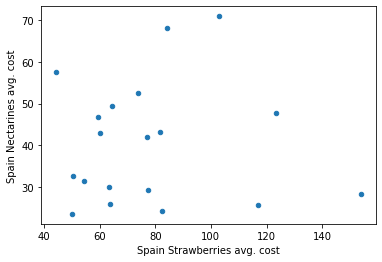

In [155]:
full_plot.plot.scatter(x = 1, y = 2)

In [180]:
import sklearn.linear_model

country_food_df_li = country_food_df['Spain Strawberries avg. cost']
country_gdp_df_li = country_gdp_df['Spain']

#country_food_df_li.pop(2017)

xs_reshape = np.array(country_food_df_li).reshape(-1, 1)
print(country_food_df_li.shape)
print(xs_reshape.shape)
print(xs_reshape)

model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, country_gdp_df_li)
# len(country_food_df_li) #23
# len(country_gdp_df_li) #25

25

7. Using sklearn

    1. Predict the price of strawberries and the GDP in year 3020.